In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
import brian2 as b2

from utils.custom_sounds import Tone
from utils.log import logger
from cochleas.hrtf_utils import run_hrtf
from cochleas.consts import ITD_REMOVAL_STRAT
from analyze import sound_analysis as SA
import logging

2025-01-14 10:31:34,928 [INFO ]  

>>>>> start execution


# ILD only

approssimazione: puntiamo all'effetto di una HRTF, solo in termini di ILD. Questo significa:
- passare il suono in input in una HRTF esistente -> `GammatoneCochlea.run_hrtf`
- analizzare i due lati per identificare qual è l'ITD -> `analyze.sound_analysis.itd`
- anticipare il lato che sente il suono in ritardo per allinearlo all'altro -> basarsi su `HeadlessDatabase`

Il risultato di questa operazione sarà, però, che il momento in cui "i due suoni arrivano alle ANF" (o più propriamente: il momento in cui il segnale mostra l'effetto dei suoni) cambierà tra una posizione e l'altra. Se questo non ci piace, si può risolvere, per ora puntiamo a ottenere l'effetto sperato.


HEADELESS


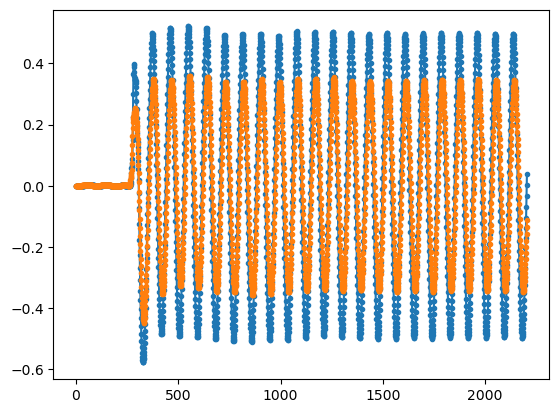

In [69]:
import math

sound = Tone(500 * b2.Hz, 50 * b2.ms)
ANGLE = -30
hrtfed = run_hrtf(
    sound,
    ANGLE,
    {
        "subj_number": 7,
        "ild_only": True,
        "itd_remove_strategy": ITD_REMOVAL_STRAT.COMPUTED,
        "show_ITD_plots": False,
    },
)
samplerate = hrtfed.samplerate
import matplotlib.pyplot as plt

plt.show()
print("HEADELESS")
hrtfed = run_hrtf(
    sound,
    ANGLE,
    {
        "subj_number": 7,
        "ild_only": True,
        "itd_remove_strategy": ITD_REMOVAL_STRAT.COMPUTED,
        "show_ITD_plots": False,
    },
)
# left = hrtfed.left[40 * b2.ms :]
# plt.plot(left.times + 40 * b2.ms, left, ".-")
# plt.show()
# right = hrtfed.right[40 * b2.ms :]
# plt.plot(right.times + 40 * b2.ms, right, ".-")
hrtfed = hrtfed.resized(math.floor(50 * b2.ms * samplerate))

plt.plot(hrtfed[:50*b2.ms], ".-")

when computing ITD


WARNING    /home/paolo/Documents/school/master/polimi/thesis/polithesis/src/analyze/sound_analysis.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, [left_plot, right_plot] = plt.subplots(2, 1)
 [py.warnings]


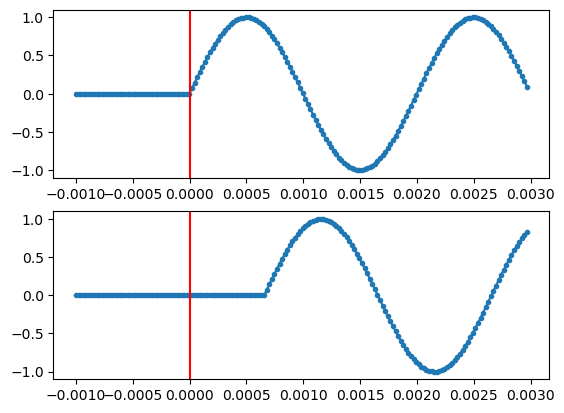

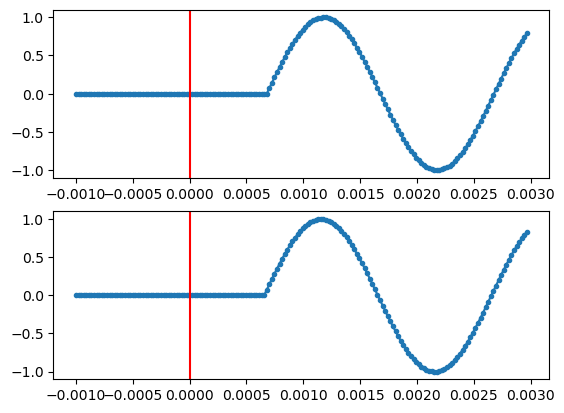

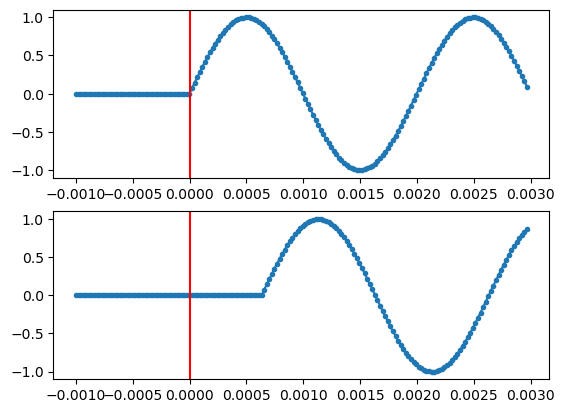

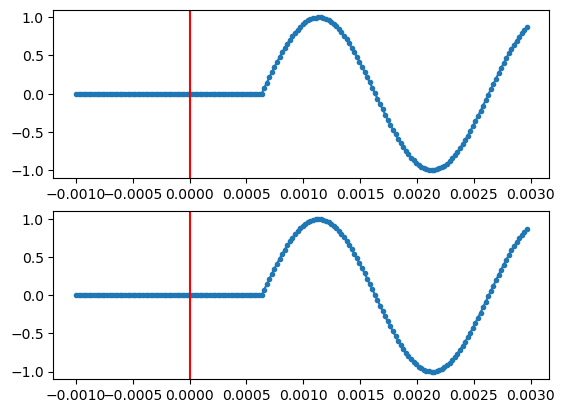

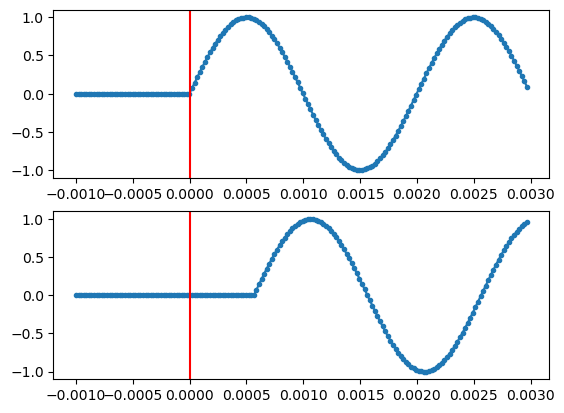

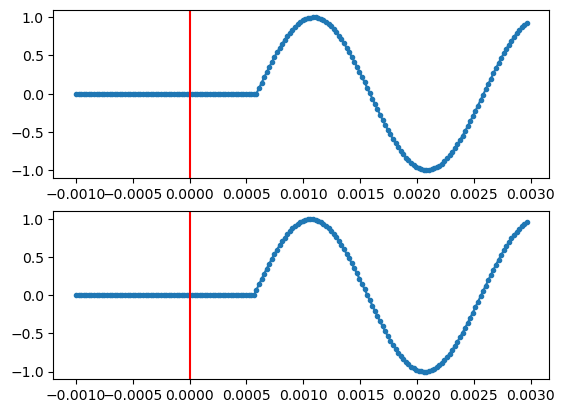

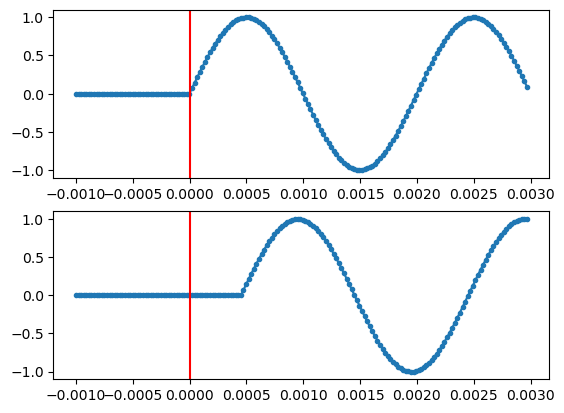

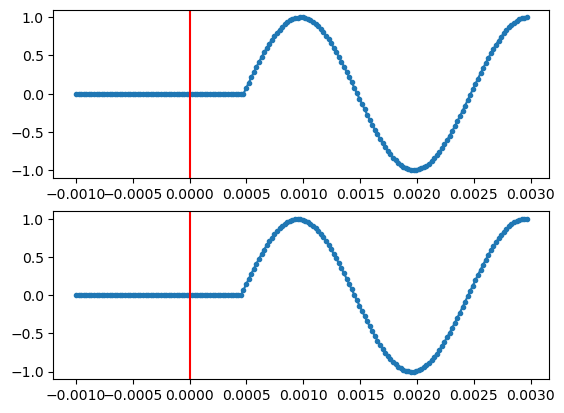

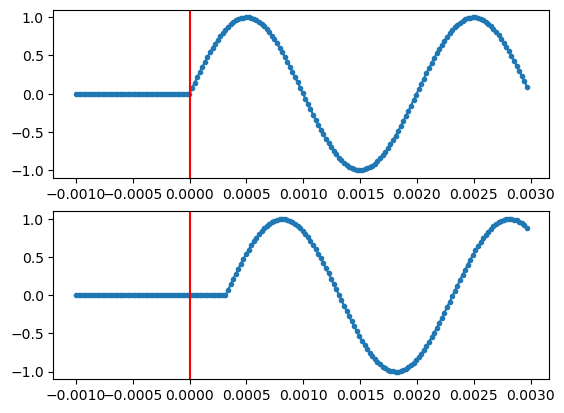

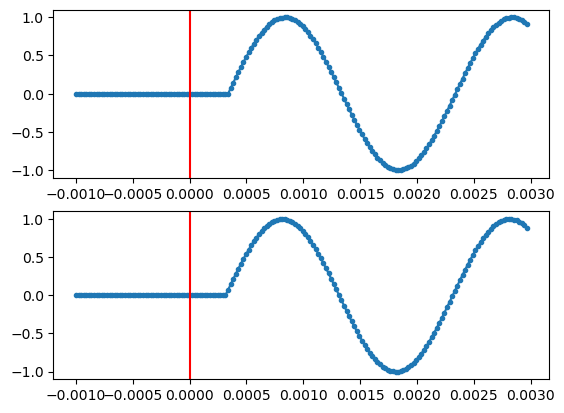

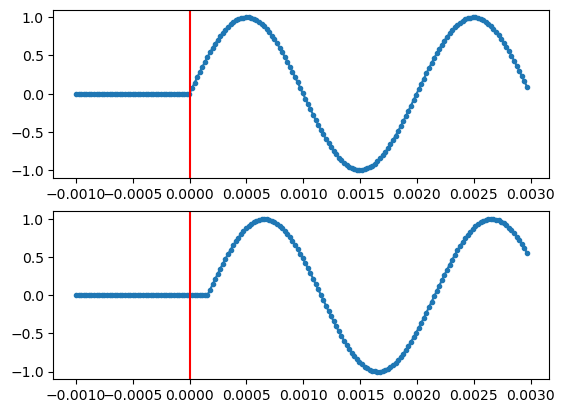

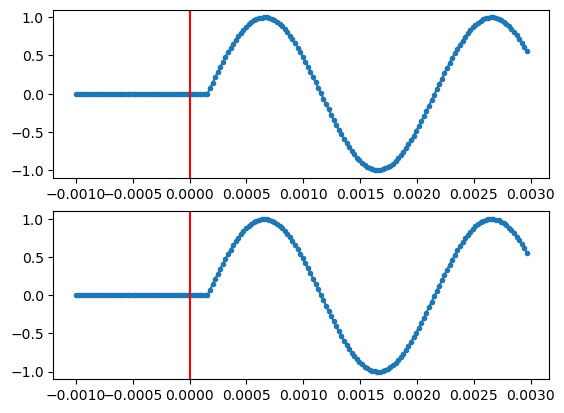

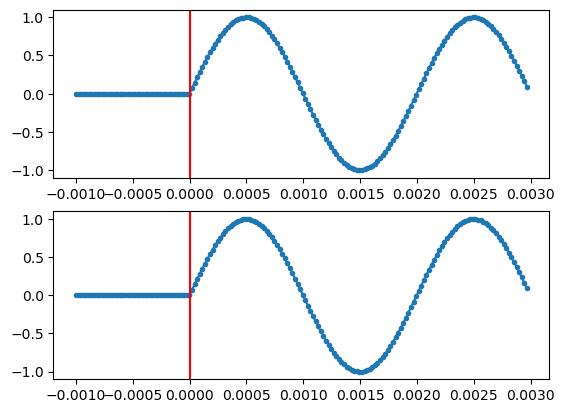

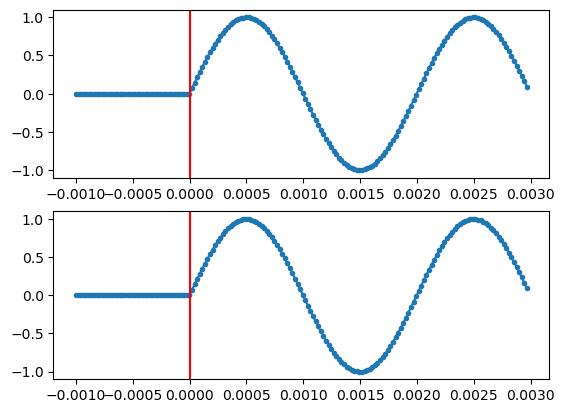

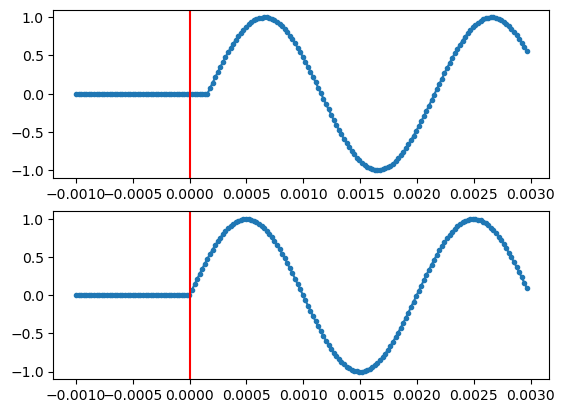

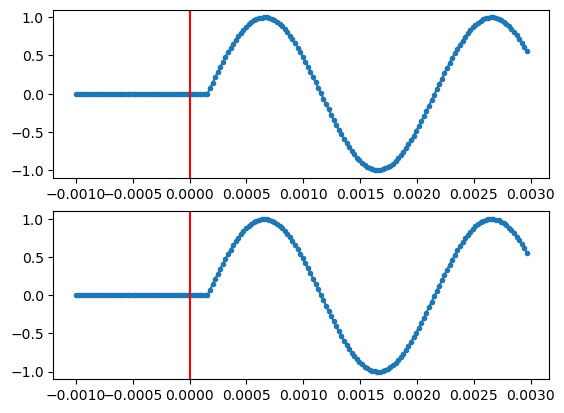

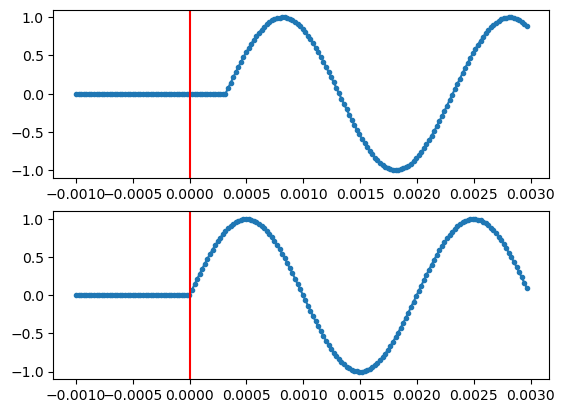

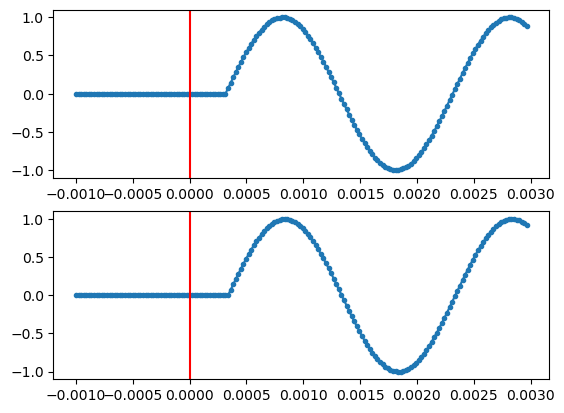

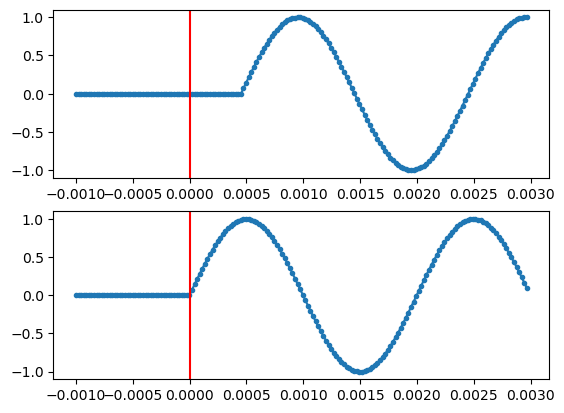

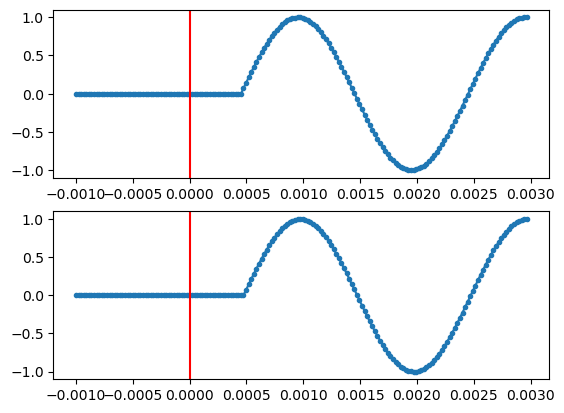

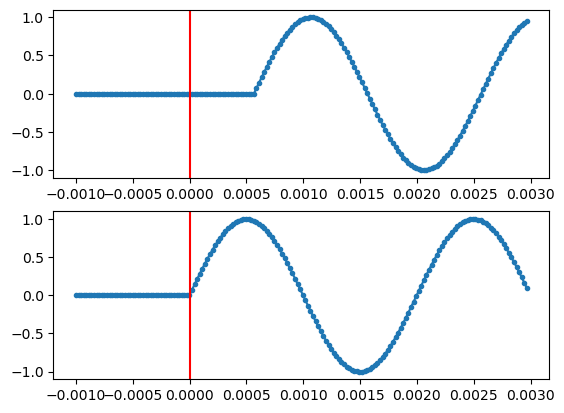

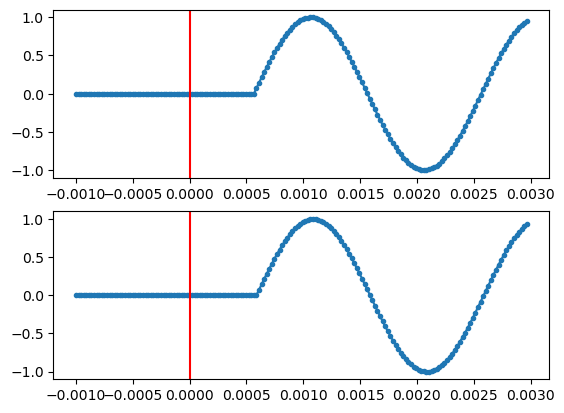

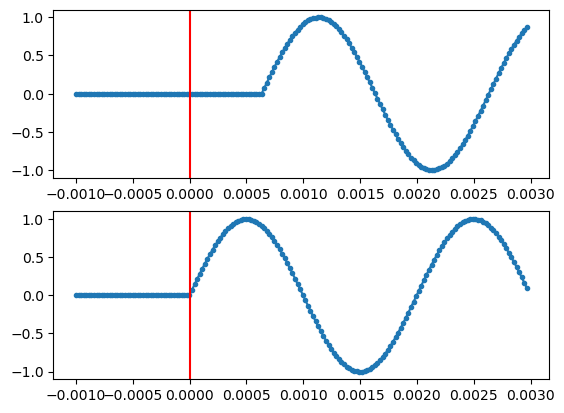

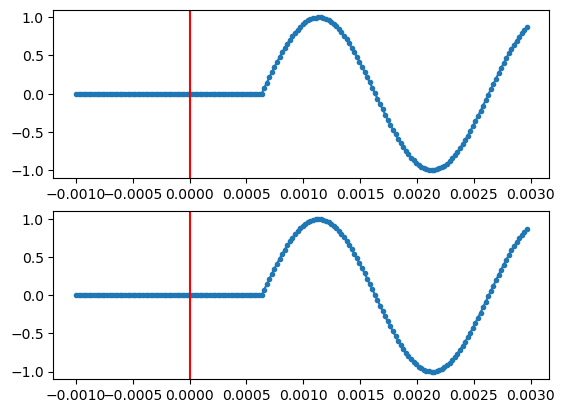

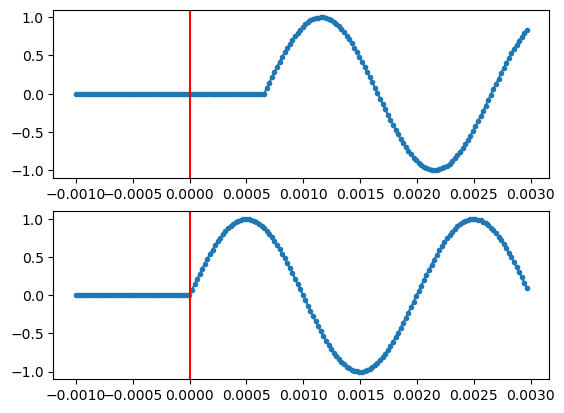

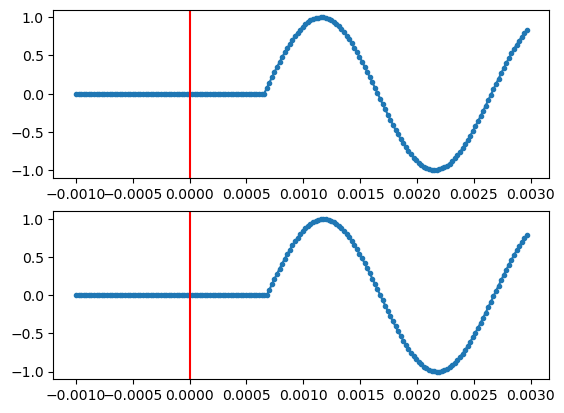

In [3]:
sound = Tone(500 * b2.Hz, 50 * b2.ms)
ANGLE = -30
print("when computing ITD")
for ANGLE in range(-90, 91, 15):
    logger.setLevel(logging.WARNING)
    binaural_sound = run_hrtf(
        sound,
        ANGLE,
        {
            "subj_number": "headless",
            "ild_only": True,
            "itd_remove_strategy": ITD_REMOVAL_STRAT.COMPUTED,
            "show_ITD_plots": True,
        },
    )

WHEN USING HRTF ESTIMATE
-90
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
-75
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
-60
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
-45
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
-30
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
-15
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
0
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
15
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
30
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
45
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
60
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
75
Sound duration 50. ms, channels 2, samplerate 44.1 kHz
90
Sound duration 50. ms, channels 2, samplerate 44.1 kHz


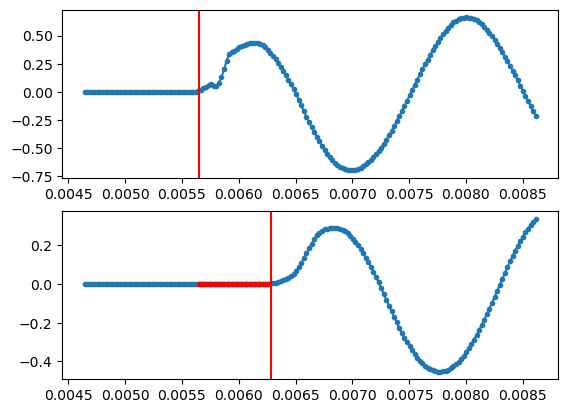

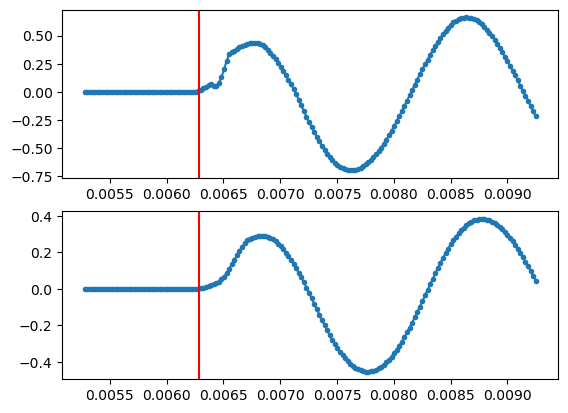

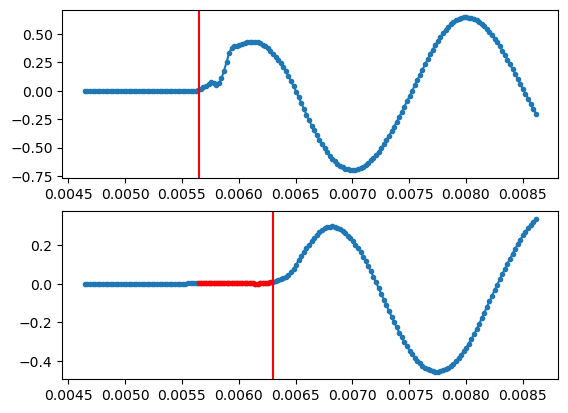

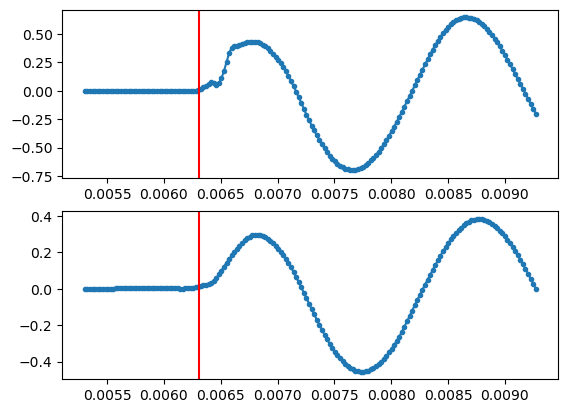

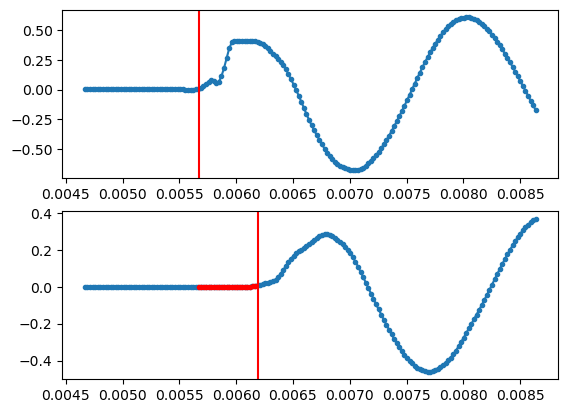

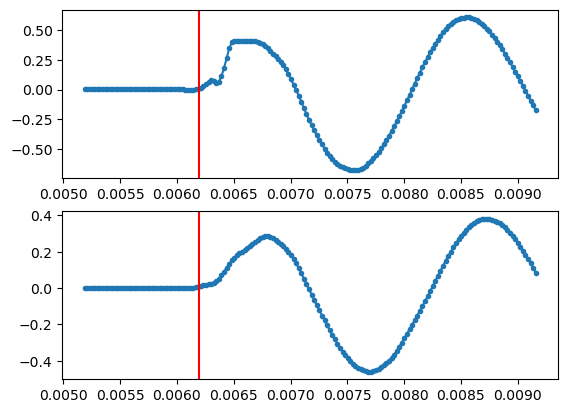

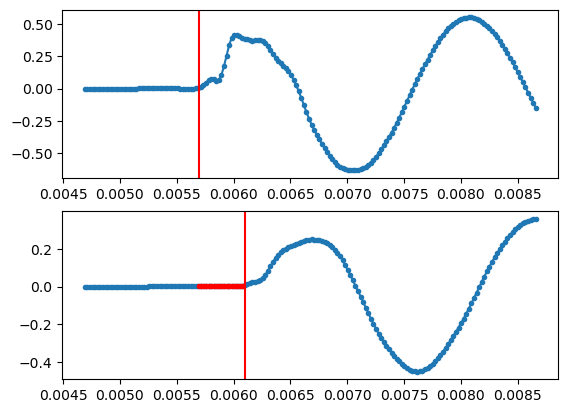

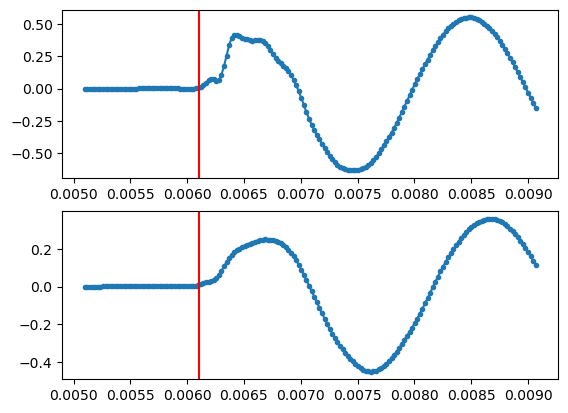

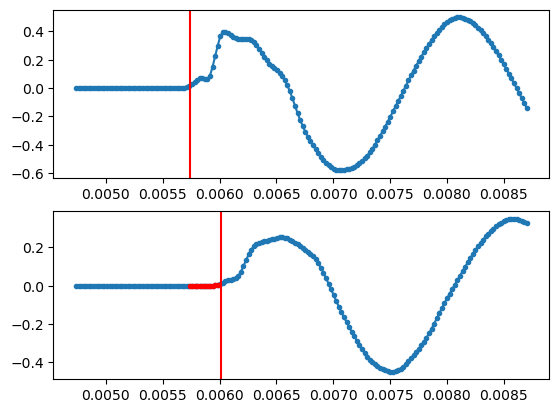

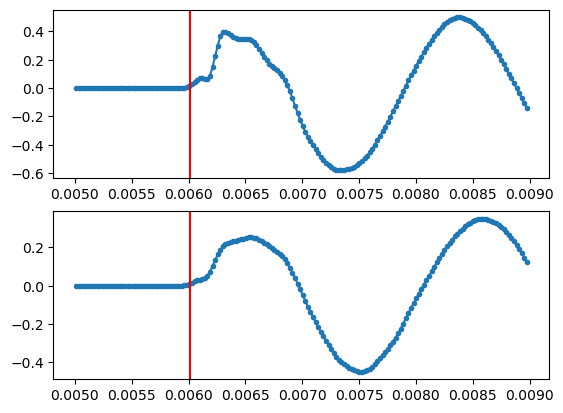

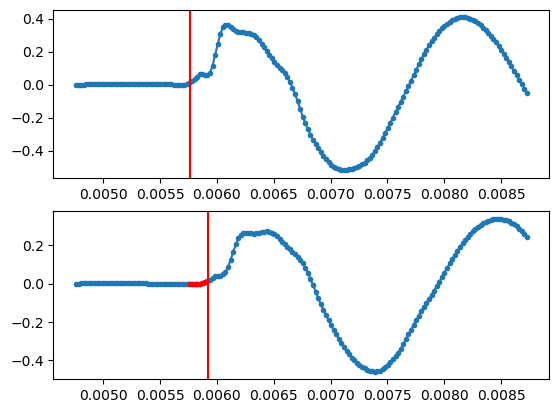

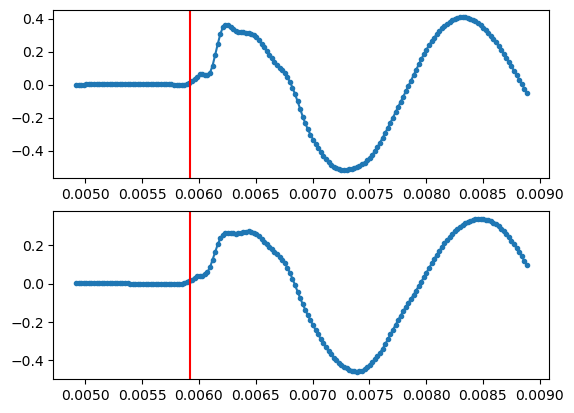

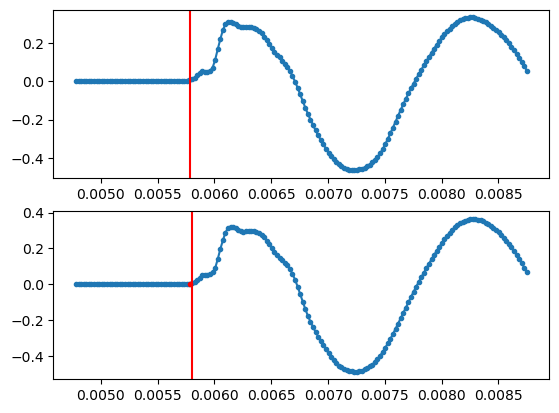

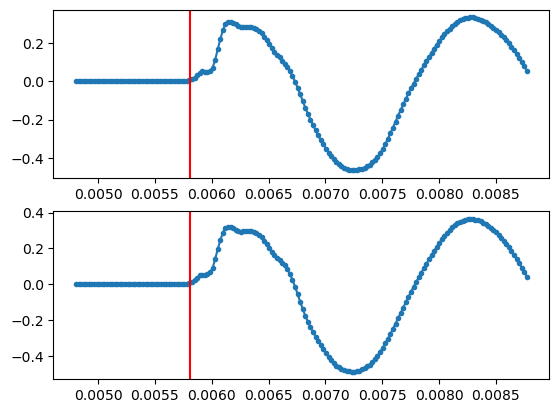

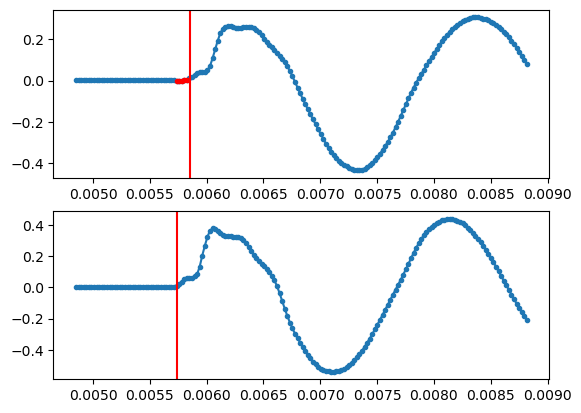

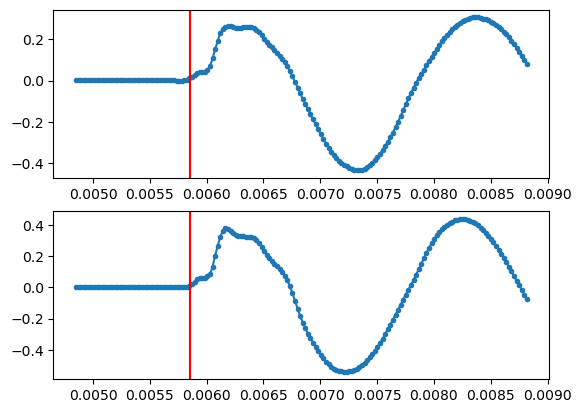

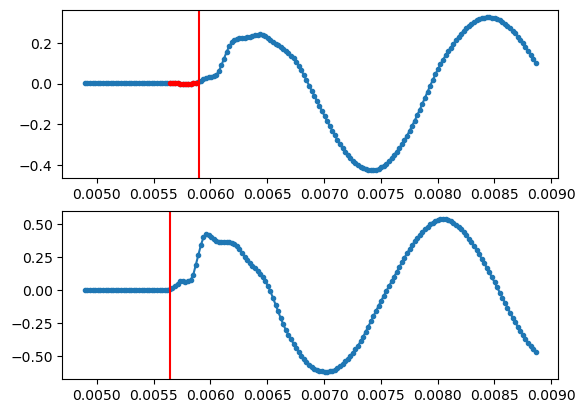

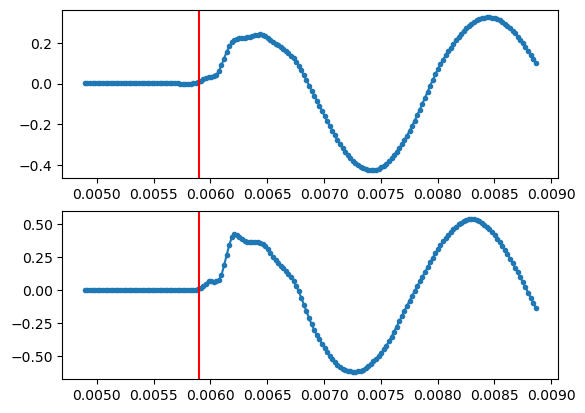

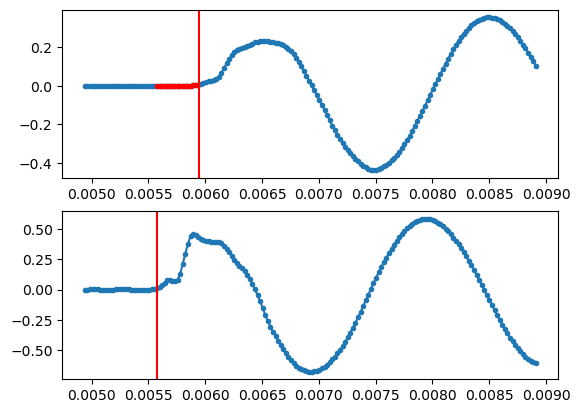

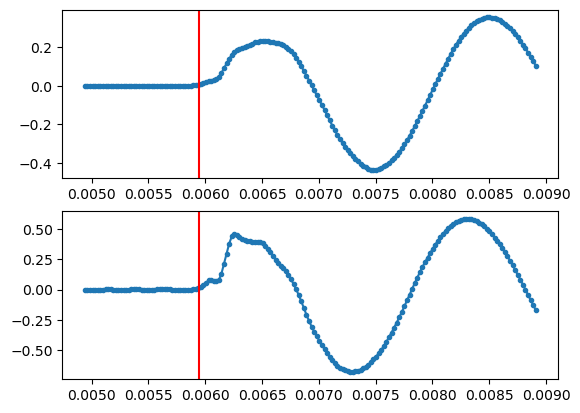

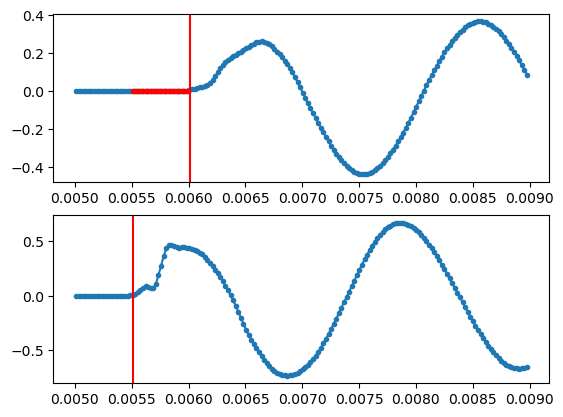

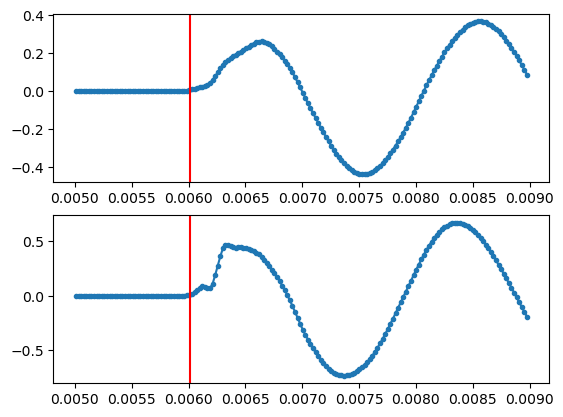

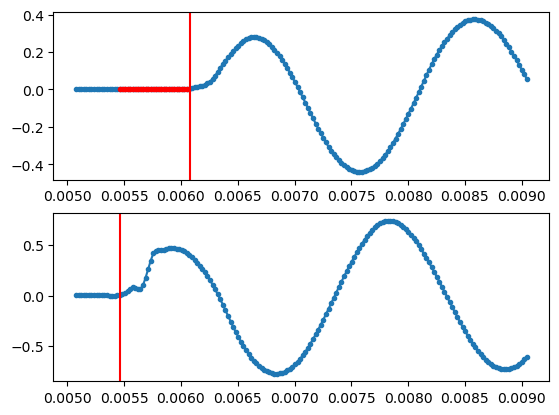

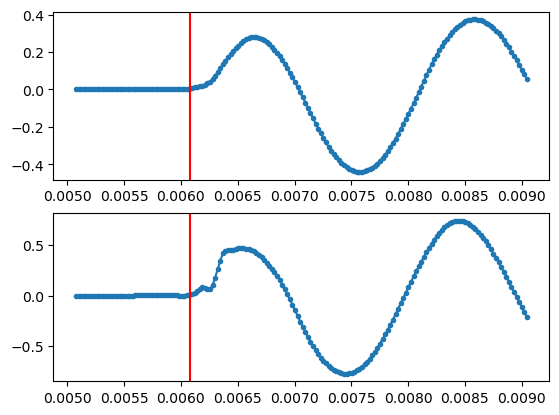

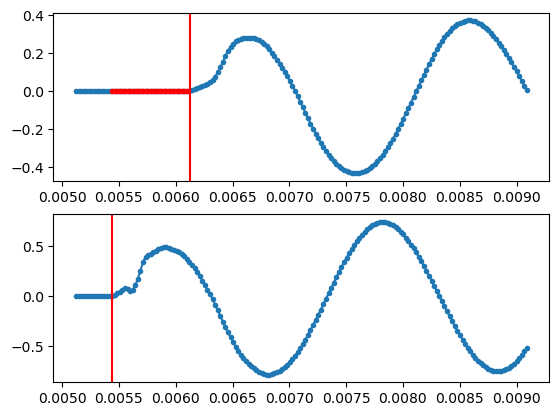

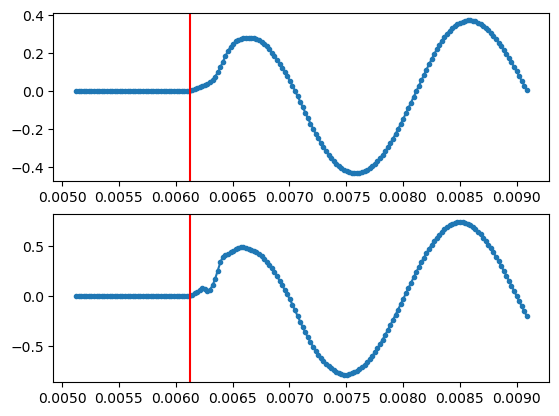

In [32]:
print("WHEN USING HRTF ESTIMATE")
import math

sound = Tone(500 * b2.Hz, 50 * b2.ms)
for ANGLE in range(-90, 91, 15):
    logger.setLevel(logging.WARNING)
    print(ANGLE)
    itd = run_hrtf(
        sound,
        ANGLE,
        {
            "subj_number": 7,
            "ild_only": True,
            "itd_remove_strategy": ITD_REMOVAL_STRAT.ESTIMATE_FROM_HRTF,
            "show_ITD_plots": True,
        },
    )
    print(itd)
    # itd = run_hrtf(sound,ANGLE,{
    #                     "subj_number": "headless",
    #                     "ild_only": True,
    #                     "itd_remove_strategy": ITD_REMOVAL_STRAT.ESTIMATE_FROM_HRTF,
    #                     "show_ITD_plots": True
    #                 }, )
    # print(itd)

# headless -> aggiungo 5ms di silenzio e taglio la fine
# compensate -> taglio il lato che ho ritardato